In [7]:
import nltk
from nltk import Text, sent_tokenize, word_tokenize, RegexpTokenizer

In [8]:
import pandas as pd

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
sleep = open('/home/amn34/metis/stuff/noirs/chandler/39_rc_bigsleep.txt').read()

sleep = sleep.decode('utf-8', 'ignore')

sleep = sleep.lower()

tokenizer = RegexpTokenizer(r'\w+')

sleepwordsorig = tokenizer.tokenize(sleep)

from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.append('said')

sleepstop = [w for w in sleepwordsorig if not w in stop]

print len(sleepstop)/float(len(sleepwordsorig))

print 'proportional number of stopwords pages:', 277*31642/68703

sent = pd.read_pickle('sentiment.pkl')

#sent.fillna(0, inplace=True)

#sent.sentiment.replace({'negative':-1,'positive':1}, inplace=True)

#sent['word'] = sent['word'].values.astype('unicode')

#sent.to_pickle('sentiment.pkl')

sleepwords = pd.DataFrame(columns=['word'])

sleepwords.word = sleepstop

sleepsentiment = pd.merge(sleepwords, sent, how='left', on='word')

sleepsentiment.head()

0.460562129747
proportional number of stopwords pages: 127


,word,emotion,sentiment
0,eleven,NaN,NaN
1,clock,anticipation,0.0
2,morning,NaN,NaN
3,mid,0,0.0
4,october,NaN,NaN


In [11]:
sleepsentiment.fillna(0, inplace=True)

In [12]:
len(sleepstop)/127.0

249.1496062992126

In [13]:
import numpy as np

In [14]:
sleepsentiment.fillna(0,inplace=True)

In [15]:
sample = sleepsentiment[0:1000]

In [16]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in xrange(0, len(seq), size))

In [17]:
pagesent = []

for i in chunker(sleepsentiment,150):
    pagesent.append(sum(i.sentiment))

In [18]:
len(pagesent)

211

<Container object of 211 artists>

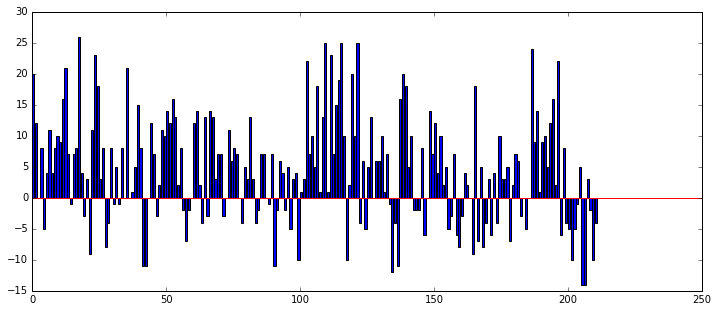

In [19]:
plt.figure(figsize=(12,5))
plt.axhline(y=0, color='r')
plt.bar(range(len(pagesent)),pagesent)

In [20]:
words = word_tokenize(sleep)

In [21]:
sentences = sent_tokenize(sleep)

In [22]:
print len(sentences), len(words), len(words)/float(len(sentences))

6591 81341 12.3412228797


In [23]:
ss = sleepsentiment.sentiment.values

In [24]:
from collections import Counter

In [25]:
Counter(ss)

Counter({-1.0: 3828, 0.0: 23048, 1.0: 4766})

In [26]:
pospage = []
negpage = []

for i in chunker(sleepsentiment,150):
    postemp = 0
    negtemp = 0
    for j in i.sentiment.values:
        if j == 1.0:
            postemp += 1
        elif j == -1.0:
            negtemp -= 1
    pospage.append(postemp)
    negpage.append(negtemp)

In [27]:
pages = []

wordfeels = zip(sleepsentiment.word, sleepsentiment.sentiment)

In [28]:
pages = []

for i in chunker(wordfeels, 150):
    pagepos = []
    pageneg = []
    
    for j in i:
        if j[1] == 1.0:
            pagepos.append(j[0])
        elif j[1] == -1.0:
            pageneg.append(j[0])
    pages.append((pagepos, pageneg))

In [29]:
pages[0]

([u'sun',
  u'shining',
  u'clearness',
  u'suit',
  u'neat',
  u'clean',
  u'care',
  u'well',
  u'main',
  u'entrance',
  u'broad',
  u'knight',
  u'armor',
  u'tree',
  u'convenient',
  u'knight',
  u'helmet',
  u'back',
  u'sociable',
  u'tree',
  u'stood',
  u'help',
  u'back',
  u'wide',
  u'white',
  u'slim',
  u'young',
  u'shiny',
  u'decorative',
  u'carefully',
  u'large',
  u'solid',
  u'comfortable'],
 [u'hard',
  u'dark',
  u'black',
  u'black',
  u'dark',
  u'sober',
  u'dark',
  u'long',
  u'trying',
  u'dark',
  u'black',
  u'maroon',
  u'uneven'])

In [30]:
wordfeels

[(u'eleven', 0.0),
 (u'clock', 0.0),
 (u'morning', 0.0),
 (u'mid', 0.0),
 (u'october', 0.0),
 (u'sun', 1.0),
 (u'shining', 1.0),
 (u'look', 0.0),
 (u'hard', -1.0),
 (u'wet', 0.0),
 (u'rain', 0.0),
 (u'clearness', 1.0),
 (u'foothills', 0.0),
 (u'wearing', 0.0),
 (u'powder', 0.0),
 (u'blue', 0.0),
 (u'suit', 1.0),
 (u'dark', -1.0),
 (u'blue', 0.0),
 (u'shirt', 0.0),
 (u'tie', 0.0),
 (u'display', 0.0),
 (u'handkerchief', 0.0),
 (u'black', -1.0),
 (u'brogues', 0.0),
 (u'black', -1.0),
 (u'wool', 0.0),
 (u'socks', 0.0),
 (u'dark', -1.0),
 (u'blue', 0.0),
 (u'clocks', 0.0),
 (u'neat', 1.0),
 (u'clean', 1.0),
 (u'shaved', 0.0),
 (u'sober', -1.0),
 (u'care', 1.0),
 (u'knew', 0.0),
 (u'everything', 0.0),
 (u'well', 1.0),
 (u'dressed', 0.0),
 (u'private', 0.0),
 (u'detective', 0.0),
 (u'ought', 0.0),
 (u'calling', 0.0),
 (u'four', 0.0),
 (u'million', 0.0),
 (u'dollars', 0.0),
 (u'main', 1.0),
 (u'hallway', 0.0),
 (u'sternwood', 0.0),
 (u'place', 0.0),
 (u'two', 0.0),
 (u'stories', 0.0),
 (u'high

In [31]:
sleepsentiment.head()

,word,emotion,sentiment
0,eleven,0,0.0
1,clock,anticipation,0.0
2,morning,0,0.0
3,mid,0,0.0
4,october,0,0.0


In [32]:
len(pospage)

211

<Container object of 211 artists>

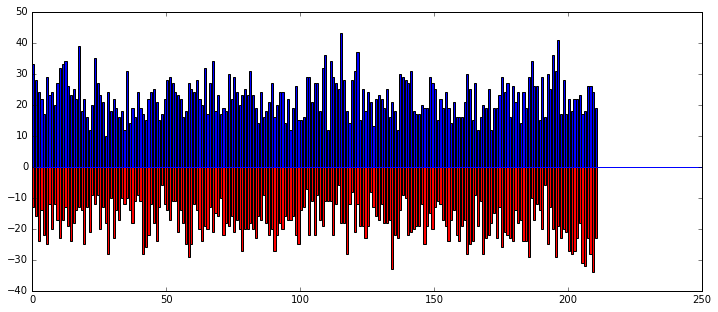

In [33]:
plt.figure(figsize=(12,5))
plt.axhline(y=0)
plt.bar(range(len(pospage)),pospage)
plt.bar(range(len(negpage)), negpage, color='r')

In [34]:
pagesent = map(int,pagesent)

In [35]:
len(pagesent)

211

In [36]:
import scipy.fftpack

In [37]:
woman = [u'she',u'her',u'girl']
womancount = []
for i in chunker(sleepwordsorig,326):
    womantmp = 0
    for word in i:
        if word in woman:
            womantmp+=1
    womancount.append(womantmp)

<Container object of 211 artists>

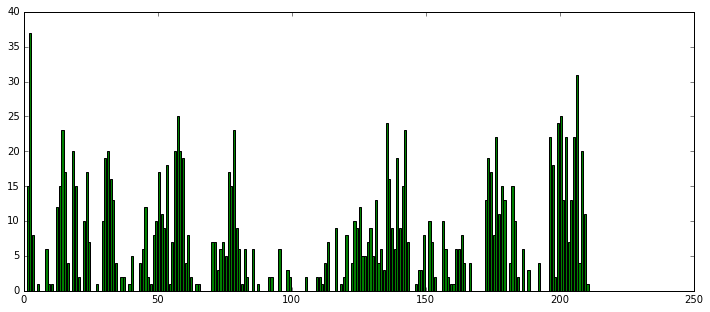

In [38]:
plt.figure(figsize=(12,5))
plt.bar(range(len(womancount)),womancount,color='g')

In [39]:
womanpage = [i for i in range(len(womancount)) if womancount[i] > 20]

In [40]:
womanpage

[2, 14, 57, 78, 135, 142, 176, 196, 199, 200, 202, 205, 206]

In [41]:
guncount = []
gun = ['gun','guns']
for i in chunker(sleepwordsorig,326):
    guntmp = 0
    for word in i:
        if word in gun:
            guntmp+=1
    guncount.append(guntmp)

<Container object of 211 artists>

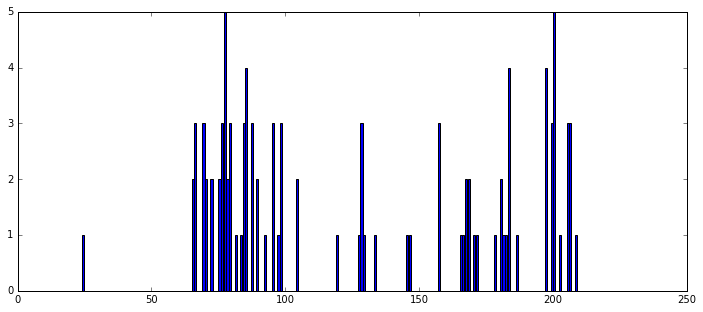

In [42]:
plt.figure(figsize=(12,5))
plt.bar(range(len(guncount)),guncount)

In [43]:
gunpage = [i for i in range(len(guncount)) if guncount[i] > 3]

In [44]:
len(sleepwords)

31642

In [45]:
sleepwords.head()

,word
0,eleven
1,clock
2,morning
3,mid
4,october


In [46]:
plotpts = [4260, 6219, 9158, 10469, 12942, 13589, 14106, 16530, \
          19304, 23920, 26098, 27035, 27779, 30114, 31377]

In [47]:
plotpg = [((i - 1) // 150) + 1 for i in plotpts]

In [48]:
len(plotpts)

15

In [49]:
plotpg

[29, 42, 62, 70, 87, 91, 95, 111, 129, 160, 174, 181, 186, 201, 210]

In [52]:
len(pagesent)

211

In [53]:
pagecontent = []
for i in chunker(sleepstop, 150):
    pagecontent.append(i)

In [54]:
def printpage(i):
    print ' '.join(pagecontent[i])

In [55]:
printpage(111)

identification goddamned funny police racket old woman look window see guy running pick line six months later show hotel help clear photo sure one qualifications good hotel help yeah eddie mars wife live together friendly eddie says possibilities first regan carried fifteen grand packed clothes time real money tell top card bunch hay lot jack regan might boy around could take look somebody looking maybe give damn wife says never made nickel old man sternwood except room board packard 120 wife gave tie ex legger rich gravy beats well guy ducks fifteen grand pants folks know well money might duck fifteen grand two kids high school first thought somebody rolls rolls hard take desert plant among cactuses like well regan carried gat plenty experience using greasy faced liquor mob understand commanded whole brigade irish troubles back 1922 whenever guy like white meat heister car garage makes whoever rolled know sweet


In [56]:
pagesent[111]

23

In [57]:
pages[111]

([u'police',
  u'pick',
  u'help',
  u'clear',
  u'sure',
  u'good',
  u'help',
  u'live',
  u'friendly',
  u'grand',
  u'real',
  u'money',
  u'top',
  u'might',
  u'give',
  u'board',
  u'rich',
  u'well',
  u'grand',
  u'know',
  u'well',
  u'money',
  u'might',
  u'grand',
  u'like',
  u'well',
  u'plenty',
  u'experience',
  u'understand',
  u'back',
  u'like',
  u'white',
  u'know',
  u'sweet'],
 [u'funny',
  u'racket',
  u'boy',
  u'damn',
  u'hard',
  u'desert',
  u'greasy',
  u'liquor',
  u'mob',
  u'brigade',
  u'troubles'])

In [58]:
printpage(185)

gun might automatic finished whirled perhaps would nice allow another shot two like gentleman old school gun still wait longer long enough gentleman old school shot four times colt straining ribs gun jumped hand kicked reached hands stomach could hear smack hard body fell like straight forward holding together broad hands fell face wet gravel sound silver wig make sound either stood rigid rain swirling walked around canino kicked gun without purpose walked bent sideways picked put close beside spoke moodily talking afraid come back date told arranged began laugh like loon bending touching little stood small key thin chain bitterly kill stopped laughing suddenly started went behind unlocked handcuffs yes softly suppose 30 another day sun shining captain gregory missing persons bureau looked heavily office window barred upper floor hall justice white clean rain turned ponderously swivel chair tamped pipe heat scarred thumb stared bleakly got another jam oh


In [59]:
printpage(186)

heard brother sit day fanny look brain head surprised hear shooting canino right guess figure homicide boys pinned medals lot killing going around getting share smiled patiently told girl eddie mars wife told listened carefully yawned tapped gold studded mouth palm like tray guess figure ought found fair deduction maybe knew maybe thought eddie woman wanted play little game like would smart smart ever get let think getting away maybe think letting eddie get away personal reasons held big hand revolved thumb index second fingers really think even eddie seemed know talk day raised eyebrows raising effort trick practice furrowed whole forehead smoothed full white lines turned reddish watched copper plain ordinary copper reasonably honest honest could expect man world style mainly asked come morning like believe copper like see law win like see flashy well dressed muggs like eddie mars spoiling manicures rock quarry folsom alongside poor little slum


In [60]:
pagesent[185]

0

In [61]:
pagesent[186]

24

In [62]:
pages[185]

([u'might',
  u'nice',
  u'allow',
  u'like',
  u'gentleman',
  u'enough',
  u'gentleman',
  u'hand',
  u'like',
  u'straight',
  u'forward',
  u'broad',
  u'sound',
  u'make',
  u'sound',
  u'stood',
  u'back',
  u'laugh',
  u'like',
  u'stood',
  u'laughing',
  u'yes',
  u'sun',
  u'shining',
  u'captain',
  u'justice',
  u'white',
  u'clean',
  u'jam'],
 [u'gun',
  u'shot',
  u'gun',
  u'wait',
  u'long',
  u'shot',
  u'straining',
  u'gun',
  u'smack',
  u'hard',
  u'fell',
  u'fell',
  u'rigid',
  u'gun',
  u'bent',
  u'close',
  u'spoke',
  u'afraid',
  u'loon',
  u'little',
  u'small',
  u'bitterly',
  u'kill',
  u'missing',
  u'heavily',
  u'barred',
  u'scarred',
  u'thumb',
  u'bleakly'])

In [63]:
x= range(len(pagesent))

In [64]:
gunpage

[77, 85, 183, 197, 200]

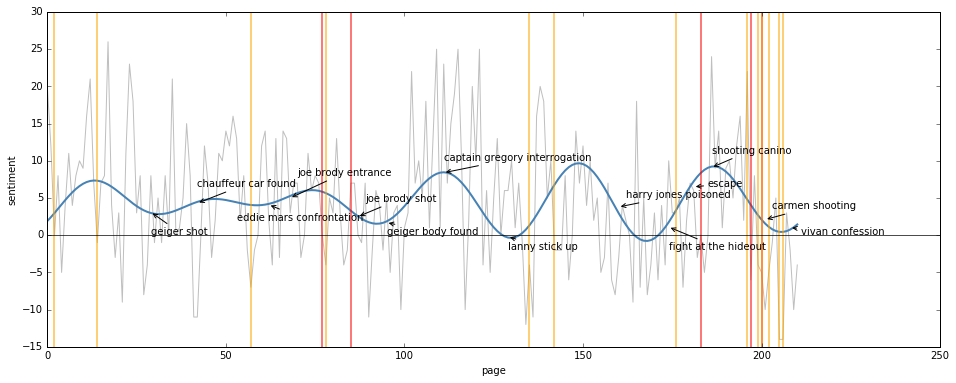

In [65]:
cN = 211
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(pagesent)

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/13)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
plt.plot(x,cy, alpha=0.5, color='grey')
plt.plot(x,cy2, linewidth=2, color='steelblue')

    
ax.annotate('geiger shot', xy=(29, 3.1), xytext=(29, 0),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('chauffeur car found', xy=(42, 4.3), xytext=(42, 6.5),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('eddie mars confrontation', xy=(62, 4.1), xytext=(53, 2),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('joe brody entrance', xy=(68, 5),xytext=(70, 8),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('joe brody shot', xy=(87, 2.5), xytext=(89,4.5),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('geiger body found', xy=(95, 1.7), xytext=(95,0),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('captain gregory interrogation', xy=(111, 8.4), xytext=(111,10),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('lanny stick up', xy=(129, -0.2),xytext=(129,-2),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('harry jones poisoned', xy=(160, 3.8),xytext=(162, 5),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('fight at the hideout', xy=(174, 1.1), xytext=(174, -2),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('escape', xy=(181, 6.5), xytext=(185,6.5), 
            arrowprops=dict(arrowstyle='->'))
ax.annotate('shooting canino', xy=(186, 9.1), xytext=(186, 11),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('carmen shooting', xy=(201, 2.1), xytext=(203, 3.5),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('vivan confession', xy=(208, 1), xytext=(211, 0),
            arrowprops=dict(arrowstyle='->'))


guns = gunpage
for xc in guns:
    plt.axvline(x=xc,color='r', linewidth=1.5, alpha = 0.7)
    
girls = womanpage
for xg in girls:
    plt.axvline(x=xg, color='orange', linewidth=1.5, alpha = 0.7)
    
plt.axhline(y=0, color='black', alpha=0.7)

plt.xlabel('page')
plt.ylabel('sentiment')

In [66]:
[cy2[i-1] for i in plotpg]

[3.1356397256120965,
 4.3104343271285632,
 4.1127542600408962,
 5.4780253963665162,
 2.8970013364250429,
 1.7431437882537457,
 1.6642183152841534,
 8.4074338225015453,
 -0.14627092139792042,
 3.7967651455253573,
 1.0591778152586071,
 6.5457826776086652,
 9.070026374385165,
 2.088278856300577,
 1.0602281370506736]